In [1]:
# !pip install h2o

In [2]:
# import h2o
# from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [3]:
# importing relevant libraries

import matplotlib.pyplot as plt # plotting graphs
import seaborn as sns

from pylab import rcParams

import sys

import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize) # view max elements of numpy array

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None) #pandas shows maximum columns
pd.set_option('display.max_rows', 146) #pandas shows 73 rows

import os # for file directories

In [4]:
os.chdir('/content/drive/MyDrive/Colab Files/MercJbs') # change directory

In [5]:
ls # show current files/folders in directory

CompetitiveRunners_MLv1.2.ipynb  CompetitiveRunners_MLv2.2.ipynb  figures/
CompetitiveRunners_MLv2.0.ipynb  data/                            guides/


# Introduction

In this analysis, we have two set of data on 73 different athletes. The data under study pertains to their weekly and daily trainings where we try to predict whether or not an athlete will be injured on the next day or week of training.

This body of work helps us understand the data, providing the ground work for some machine learning algorithms which we shall implement later.

In [6]:
df_day = pd.read_csv('data/day_approach_maskedID_timeseries.csv')
df_wk = pd.read_csv('data/week_approach_maskedID_timeseries.csv')

#view first two rows of our data
df_day.head(2)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.0,0.11,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.0,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.0,0.11,0.0,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.0,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.0,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.1,0.0,0.17,0,0,1


In [7]:
df_wk.head(2)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,max km Z5-T1-T2 one day,total hours alternative training,nr. strength trainings,avg exertion,min exertion,max exertion,avg training success,min training success,max training success,avg recovery,min recovery,max recovery,nr. sessions.1,nr. rest days.1,total kms.1,max km one day.1,total km Z3-Z4-Z5-T1-T2.1,"nr. tough sessions (effort in Z5, T1 or T2).1",nr. days with interval session.1,total km Z3-4.1,max km Z3-4 one day.1,total km Z5-T1-T2.1,max km Z5-T1-T2 one day.1,total hours alternative training.1,nr. strength trainings.1,avg exertion.1,min exertion.1,max exertion.1,avg training success.1,min training success.1,max training success.1,avg recovery.1,min recovery.1,max recovery.1,nr. sessions.2,nr. rest days.2,total kms.2,max km one day.2,total km Z3-Z4-Z5-T1-T2.2,"nr. tough sessions (effort in Z5, T1 or T2).2",nr. days with interval session.2,total km Z3-4.2,max km Z3-4 one day.2,total km Z5-T1-T2.2,max km Z5-T1-T2 one day.2,total hours alternative training.2,nr. strength trainings.2,avg exertion.2,min exertion.2,max exertion.2,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,0.6,2.08,2.0,0.1,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,30.9,13.8,13.5,0.0,2.0,12.4,6.4,0.0,0.0,2.08,2.0,0.1,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,3.0,4.0,16.1,9.9,3.9,0.0,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0.09,0.08,0.1,0.0,0.0,0.0,0.18,0.16,0.2,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0.5,2.08,2.0,0.1,0.08,0.11,0.0,0.0,0.0,0.17,0.15,0.18,6.0,1.0,31.6,13.8,14.2,1.0,3.0,12.4,6.4,0.6,0.6,2.08,2.0,0.1,0.09,0.12,0.0,0.0,0.0,0.17,0.16,0.18,4.0,3.0,21.2,9.9,5.0,0.0,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0.10,0.08,0.1,0.0,0.0,0.0,0.18,0.16,0.2,0,0,0.683544,1.018868,1.490566,1


# Data Cleaning & Wrangling.

In [8]:
# replace spaces with underscores and lowercase labels for both dataset
df_day.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_wk.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [9]:
# replace fullstop with underscores for both dataset
df_day.rename(columns = lambda x: x.strip().replace(".", "_"), inplace=True)
df_wk.rename(columns = lambda x: x.strip().replace(".", "_"), inplace=True)

In [10]:
# replace fullstop with underscores for both dataset
df_day.rename(columns = lambda x: x.replace("__", "_"), inplace=True)
df_wk.rename(columns = lambda x: x.replace("__", "_"), inplace=True)

In [11]:
# convert 'Date' column which is now 'date' into categories.

df_day['date'] = df_day['date'].astype('category')
df_wk['date'] = df_wk['date'].astype('category')

## Basic Information

Here, we look at some basic characteristics of our datasets.

In [12]:
df_day.isna().sum(), df_day.isna().sum().max()

(nr_sessions                    0
 total_km                       0
 km_z3-4                        0
 km_z5-t1-t2                    0
 km_sprinting                   0
 strength_training              0
 hours_alternative              0
 perceived_exertion             0
 perceived_trainingsuccess      0
 perceived_recovery             0
 nr_sessions_1                  0
 total_km_1                     0
 km_z3-4_1                      0
 km_z5-t1-t2_1                  0
 km_sprinting_1                 0
 strength_training_1            0
 hours_alternative_1            0
 perceived_exertion_1           0
 perceived_trainingsuccess_1    0
 perceived_recovery_1           0
 nr_sessions_2                  0
 total_km_2                     0
 km_z3-4_2                      0
 km_z5-t1-t2_2                  0
 km_sprinting_2                 0
 strength_training_2            0
 hours_alternative_2            0
 perceived_exertion_2           0
 perceived_trainingsuccess_2    0
 perceived_rec

In [13]:
df_wk.isna().sum(), df_wk.isna().sum().max()

(nr_sessions                                     0
 nr_rest_days                                    0
 total_kms                                       0
 max_km_one_day                                  0
 total_km_z3-z4-z5-t1-t2                         0
 nr_tough_sessions_(effort_in_z5,_t1_or_t2)      0
 nr_days_with_interval_session                   0
 total_km_z3-4                                   0
 max_km_z3-4_one_day                             0
 total_km_z5-t1-t2                               0
 max_km_z5-t1-t2_one_day                         0
 total_hours_alternative_training                0
 nr_strength_trainings                           0
 avg_exertion                                    0
 min_exertion                                    0
 max_exertion                                    0
 avg_training_success                            0
 min_training_success                            0
 max_training_success                            0
 avg_recovery                  

Both dataset have no missing values as seen from the above.

### unique values

**What are the unique values per column in the data?**

The response here can give us an overview as to which variable/feature/column should categorical.

**week data**

In [14]:
df_wk.nunique()

nr_sessions                                        15
nr_rest_days                                        8
total_kms                                        1772
max_km_one_day                                    395
total_km_z3-z4-z5-t1-t2                           493
nr_tough_sessions_(effort_in_z5,_t1_or_t2)          7
nr_days_with_interval_session                       8
total_km_z3-4                                     378
max_km_z3-4_one_day                               177
total_km_z5-t1-t2                                 317
max_km_z5-t1-t2_one_day                           136
total_hours_alternative_training                  679
nr_strength_trainings                              10
avg_exertion                                       94
min_exertion                                       90
max_exertion                                      101
avg_training_success                               99
min_training_success                              101
max_training_success        

From the above, the response variable `injury` has only two responses i.e 0 (not injured) and 1 (injured). We shall investigate this in depth later.

The output below shows us features that have less than 30 unique values.

In [15]:
df_wk_less_than_30_unique_vals = df_wk.nunique()[df_wk.nunique() < 30].sort_values()
df_wk_less_than_30_unique_vals

injury                                           2
nr_tough_sessions_(effort_in_z5,_t1_or_t2)       7
nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1     7
nr_tough_sessions_(effort_in_z5,_t1_or_t2)_2     7
nr_rest_days                                     8
nr_days_with_interval_session                    8
nr_rest_days_1                                   8
nr_days_with_interval_session_1                  8
nr_rest_days_2                                   8
nr_days_with_interval_session_2                  8
nr_strength_trainings                           10
nr_strength_trainings_1                         10
nr_strength_trainings_2                         10
nr_sessions                                     15
nr_sessions_1                                   15
nr_sessions_2                                   15
dtype: int64

We can now proceed to plot every instance of the above in our original dataframe.

The output below did not come out nice enough. It is better to use bar charts instead of histograms.

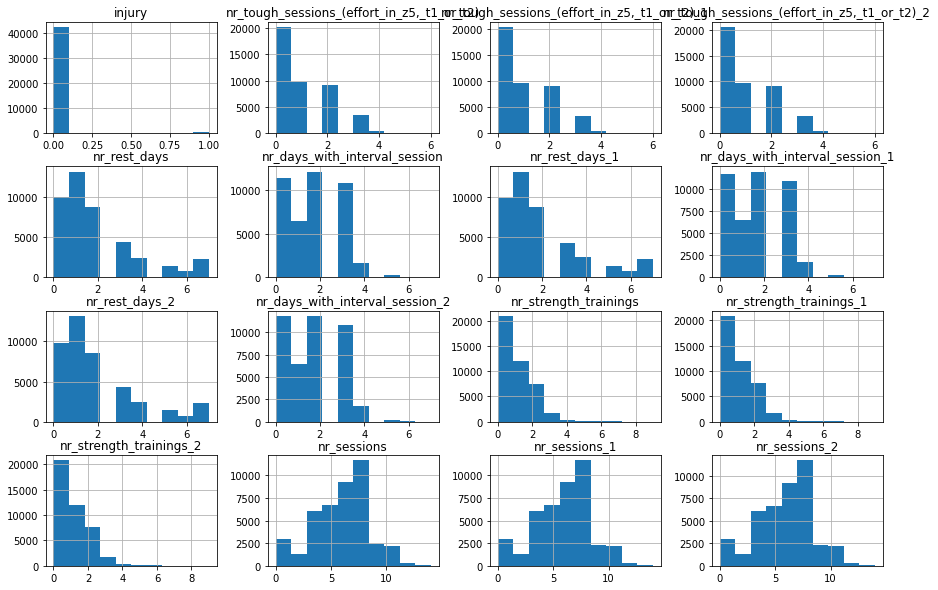

In [16]:
df_wk[list(df_wk_less_than_30_unique_vals.index)].hist(figsize=(15, 10));
plt.show()

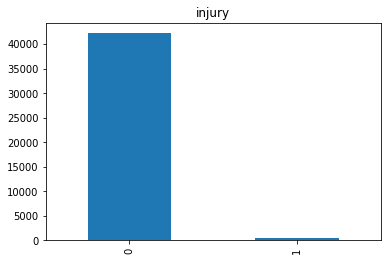

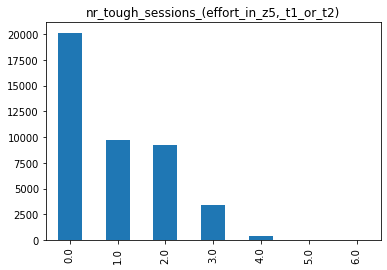

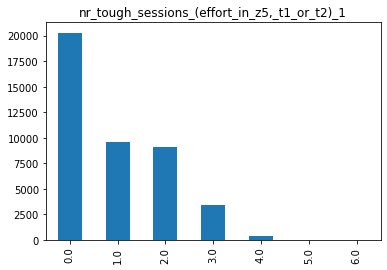

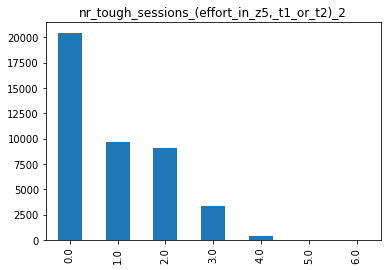

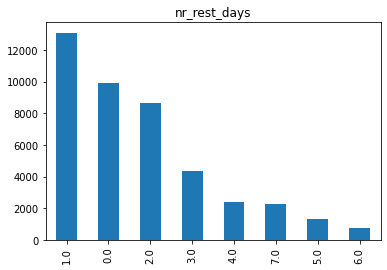

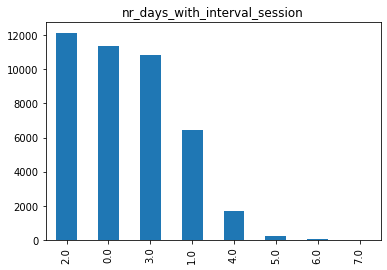

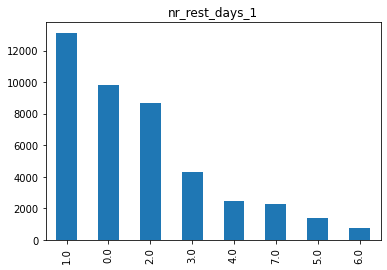

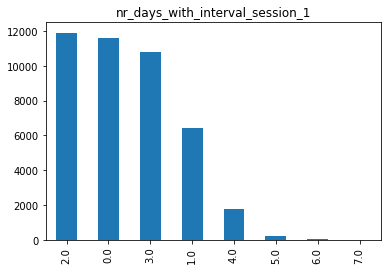

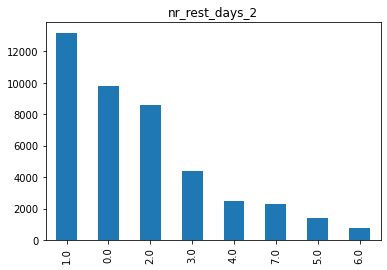

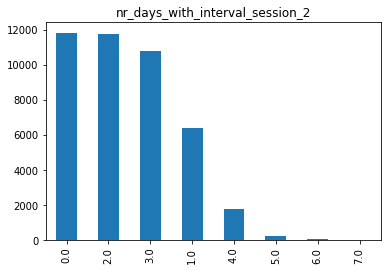

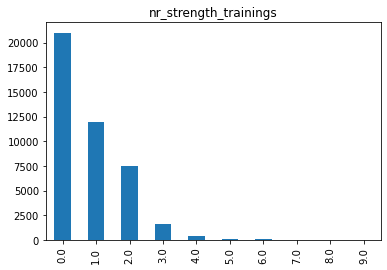

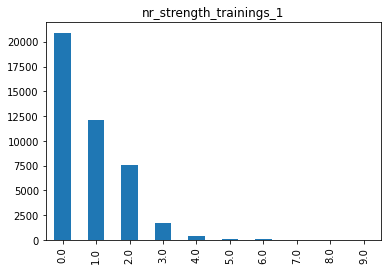

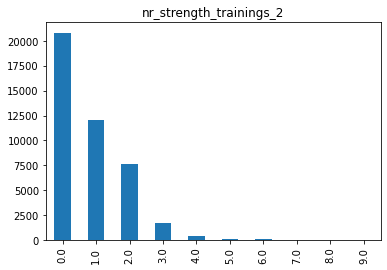

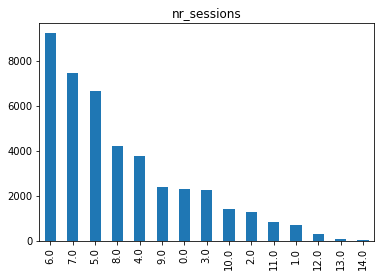

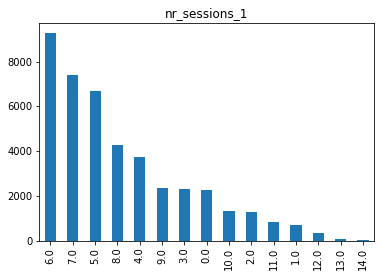

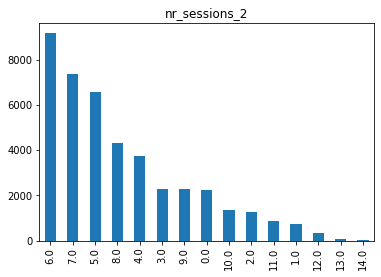

In [17]:
df_wk_subset = df_wk[list(df_wk_less_than_30_unique_vals.index)]

for col in df_wk_subset.columns:
    df_wk[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

We note two things from the above:


1.   elements should be integers and not floats
2.   the columns under study should be categorical and not float or integers.



In [18]:
df_wk[list(df_wk_less_than_30_unique_vals.index)] = df_wk[list(df_wk_less_than_30_unique_vals.index)].astype(int)
df_wk[list(df_wk_less_than_30_unique_vals.index)] = df_wk[list(df_wk_less_than_30_unique_vals.index)].astype('category')

**day data**

In [19]:
df_day.nunique()

nr_sessions                       3
total_km                        384
km_z3-4                         174
km_z5-t1-t2                     134
km_sprinting                     78
strength_training                 3
hours_alternative               208
perceived_exertion              102
perceived_trainingsuccess       102
perceived_recovery              100
nr_sessions_1                     3
total_km_1                      384
km_z3-4_1                       173
km_z5-t1-t2_1                   134
km_sprinting_1                   79
strength_training_1               3
hours_alternative_1             207
perceived_exertion_1            102
perceived_trainingsuccess_1     102
perceived_recovery_1            100
nr_sessions_2                     3
total_km_2                      381
km_z3-4_2                       176
km_z5-t1-t2_2                   134
km_sprinting_2                   79
strength_training_2               3
hours_alternative_2             207
perceived_exertion_2        

From the above, the response variable `injury` has only two responses i.e 0 (not injured) and 1 (injured). We shall investigate this in depth later.

The output below shows us features that have less than 30 unique values.

In [20]:
df_day_less_than_30_unique_vals = df_day.nunique()[df_day.nunique() < 30].sort_values()
df_day_less_than_30_unique_vals

injury                 2
nr_sessions            3
strength_training      3
nr_sessions_1          3
strength_training_1    3
nr_sessions_2          3
strength_training_2    3
nr_sessions_3          3
strength_training_3    3
nr_sessions_4          3
strength_training_4    3
nr_sessions_5          3
strength_training_5    3
nr_sessions_6          3
strength_training_6    3
dtype: int64

We can now proceed to plot every instance of the above in our original dataframe.

The output below did not come out nice enough. It is better to use bar charts instead of histograms.

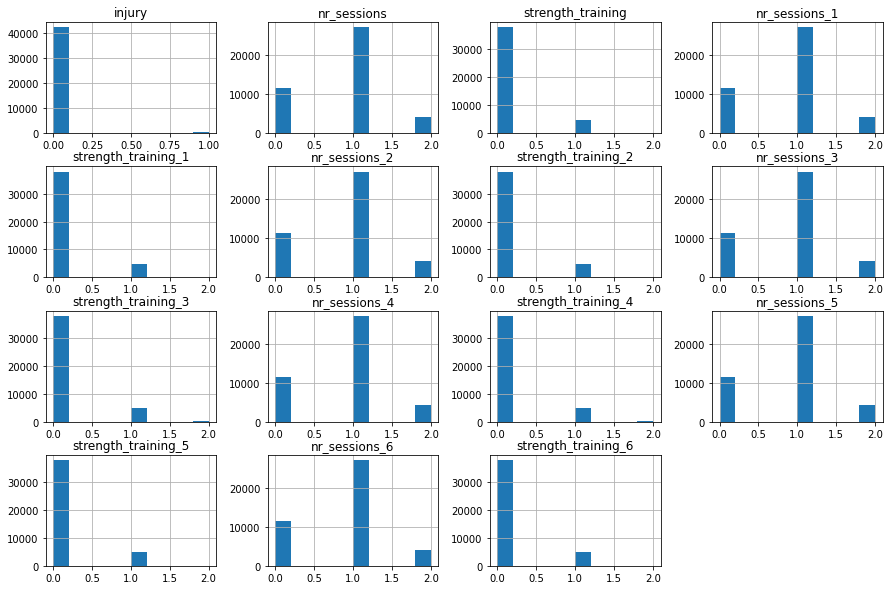

In [21]:
df_day[list(df_day_less_than_30_unique_vals.index)].hist(figsize=(15, 10));
plt.show()

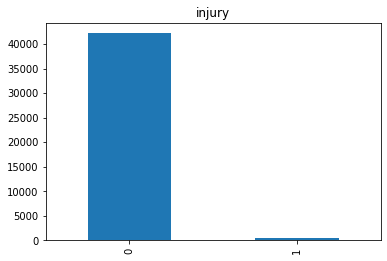

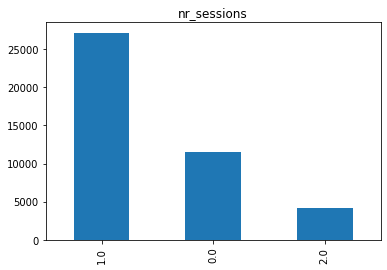

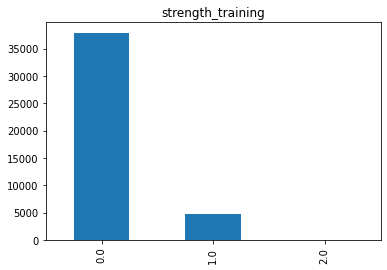

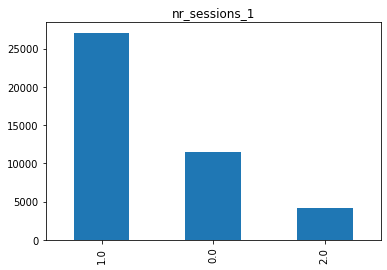

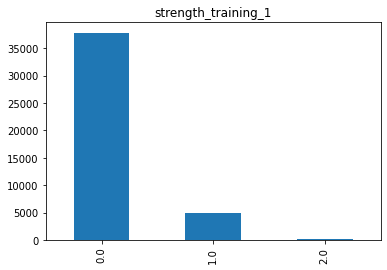

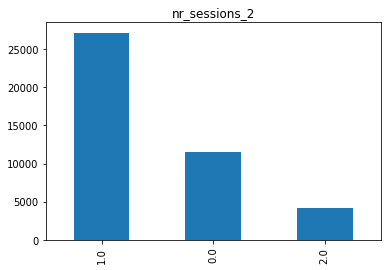

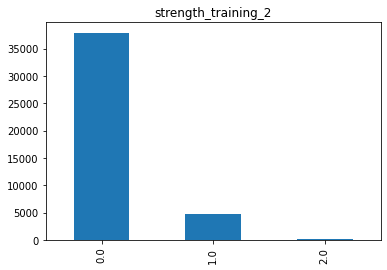

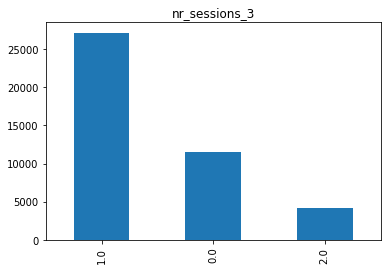

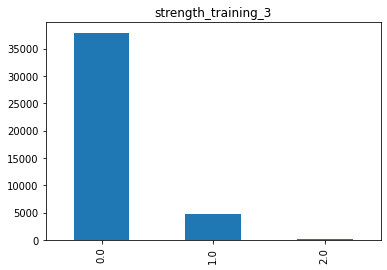

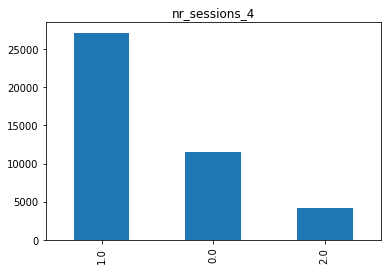

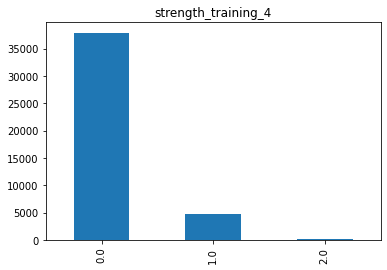

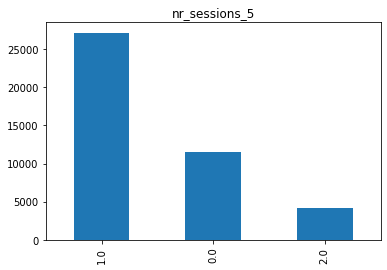

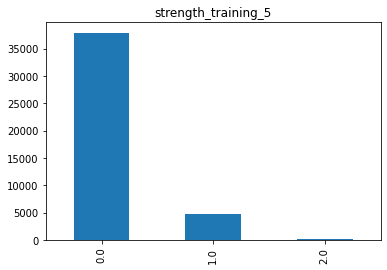

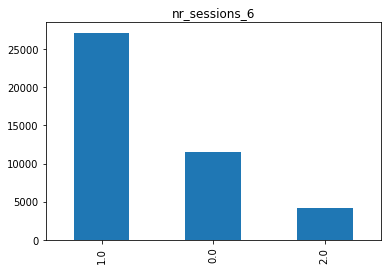

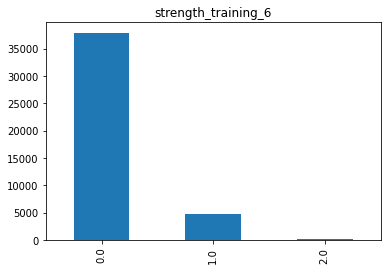

In [22]:
df_day_subset = df_day[list(df_day_less_than_30_unique_vals.index)]

for col in df_day_subset.columns:
    df_day[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

We note two things from the above:


1.   elements should be integers and not floats
2.   the columns under study should be categorical and not float or integers.



In [23]:
df_day[list(df_day_less_than_30_unique_vals.index)] = df_day[list(df_day_less_than_30_unique_vals.index)].astype(int)
df_day[list(df_day_less_than_30_unique_vals.index)] = df_day[list(df_day_less_than_30_unique_vals.index)].astype('category')

In [24]:
df_wk.shape, df_day.shape

((42798, 72), (42766, 73))

Both dataset consists of almost same amount of rows and columns.

In [25]:
print("The difference between both dataset is a difference of {} row(s) and {} column(s).".format(df_wk.shape[0] - df_day.shape[0], df_wk.shape[1] - df_day.shape[1]))

The difference between both dataset is a difference of 32 row(s) and -1 column(s).


We now save the clean datasets

In [26]:
df_day.to_csv('data/day_approach_maskedID_timeseries_v2.0.csv')
df_wk.to_csv('data/week_approach_maskedID_timeseries_v2.0.csv')

In [27]:
df_day.head()

,nr_sessions,total_km,km_z3-4,km_z5-t1-t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,nr_sessions_1,total_km_1,km_z3-4_1,km_z5-t1-t2_1,km_sprinting_1,strength_training_1,hours_alternative_1,perceived_exertion_1,perceived_trainingsuccess_1,perceived_recovery_1,nr_sessions_2,total_km_2,km_z3-4_2,km_z5-t1-t2_2,km_sprinting_2,strength_training_2,hours_alternative_2,perceived_exertion_2,perceived_trainingsuccess_2,perceived_recovery_2,nr_sessions_3,total_km_3,km_z3-4_3,km_z5-t1-t2_3,km_sprinting_3,strength_training_3,hours_alternative_3,perceived_exertion_3,perceived_trainingsuccess_3,perceived_recovery_3,nr_sessions_4,total_km_4,km_z3-4_4,km_z5-t1-t2_4,km_sprinting_4,strength_training_4,hours_alternative_4,perceived_exertion_4,perceived_trainingsuccess_4,perceived_recovery_4,nr_sessions_5,total_km_5,km_z3-4_5,km_z5-t1-t2_5,km_sprinting_5,strength_training_5,hours_alternative_5,perceived_exertion_5,perceived_trainingsuccess_5,perceived_recovery_5,nr_sessions_6,total_km_6,km_z3-4_6,km_z5-t1-t2_6,km_sprinting_6,strength_training_6,hours_alternative_6,perceived_exertion_6,perceived_trainingsuccess_6,perceived_recovery_6,athlete_id,injury,date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,1,16.4,10.0,0.0,0.0,1,0.0,0.11,0.00,0.17,1,0.0,0.0,0.0,0.0,0,1.0,0.10,0.00,0.15,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,1,16.4,10.0,0.0,0.0,1,0.00,0.11,0.00,0.17,1,0.0,0.0,0.0,0.0,0,1.0,0.10,0.00,0.15,1,5.2,0.0,0.5,1.2,0,0.0,0.10,0.00,0.17,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,1,16.4,10.0,0.0,0.0,1,0.00,0.11,0.00,0.17,1,0.0,0.0,0.0,0.0,0,1.00,0.10,0.00,0.15,1,5.2,0.0,0.5,1.2,0,0.0,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,1,16.4,10.0,0.0,0.0,1,0.00,0.11,0.00,0.17,1,0.0,0.0,0.0,0.0,0,1.00,0.10,0.00,0.15,1,5.2,0.0,0.5,1.2,0,0.00,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.0,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,1,0.0,0.10,0.00,0.17,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,1,16.4,10.0,0.0,0.0,1,0.00,0.11,0.00,0.17,1,0.0,0.0,0.0,0.0,0,1.00,0.10,0.00,0.15,1,5.2,0.0,0.5,1.2,0,0.00,0.10,0.00,0.17,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,1,0.0,0.0,0.0,0.0,1,0.0,0.10,0.00,0.17,1,17.6,7.2,0.0,0.0,0,0.0,0.11,0.00,0.17,0,0,4


# Exploratory Data Analysis

## Daily Data

### data description

In [28]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   nr_sessions                  42766 non-null  category
 1   total_km                     42766 non-null  float64 
 2   km_z3-4                      42766 non-null  float64 
 3   km_z5-t1-t2                  42766 non-null  float64 
 4   km_sprinting                 42766 non-null  float64 
 5   strength_training            42766 non-null  category
 6   hours_alternative            42766 non-null  float64 
 7   perceived_exertion           42766 non-null  float64 
 8   perceived_trainingsuccess    42766 non-null  float64 
 9   perceived_recovery           42766 non-null  float64 
 10  nr_sessions_1                42766 non-null  category
 11  total_km_1                   42766 non-null  float64 
 12  km_z3-4_1                    42766 non-null  float64 
 13  k

In [ ]:
df_day.describe()

,nr__sessions,total_km,km_z3-4,km_z5-t1-t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,nr__sessions_1,total_km_1,km_z3-4_1,km_z5-t1-t2_1,km_sprinting_1,strength_training_1,hours_alternative_1,perceived_exertion_1,perceived_trainingsuccess_1,perceived_recovery_1,nr__sessions_2,total_km_2,km_z3-4_2,km_z5-t1-t2_2,km_sprinting_2,strength_training_2,hours_alternative_2,perceived_exertion_2,perceived_trainingsuccess_2,perceived_recovery_2,nr__sessions_3,total_km_3,km_z3-4_3,km_z5-t1-t2_3,km_sprinting_3,strength_training_3,hours_alternative_3,perceived_exertion_3,perceived_trainingsuccess_3,perceived_recovery_3,nr__sessions_4,total_km_4,km_z3-4_4,km_z5-t1-t2_4,km_sprinting_4,strength_training_4,hours_alternative_4,perceived_exertion_4,perceived_trainingsuccess_4,perceived_recovery_4,nr__sessions_5,total_km_5,km_z3-4_5,km_z5-t1-t2_5,km_sprinting_5,strength_training_5,hours_alternative_5,perceived_exertion_5,perceived_trainingsuccess_5,perceived_recovery_5,nr__sessions_6,total_km_6,km_z3-4_6,km_z5-t1-t2_6,km_sprinting_6,strength_training_6,hours_alternative_6,perceived_exertion_6,perceived_trainingsuccess_6,perceived_recovery_6,athlete_id,injury
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,0.829000,7.024199,0.689436,0.574926,0.072614,0.117126,0.164331,0.247228,0.349327,0.195780,0.829561,7.039143,0.695195,0.578438,0.073135,0.116518,0.163359,0.247726,0.349382,0.196104,0.829280,7.039936,0.692611,0.578181,0.072693,0.116307,0.162977,0.247664,0.349609,0.196164,0.829865,7.042934,0.695447,0.577788,0.072167,0.116214,0.162675,0.247642,0.349797,0.196250,0.828766,7.054684,0.697388,0.580073,0.072303,0.115886,0.161330,0.247697,0.349669,0.196298,0.828813,7.051319,0.695031,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,0.581215,7.473041,2.310966,1.805558,0.484186,0.327197,0.552471,0.256781,0.368236,0.190313,0.580736,7.470759,2.328649,1.808320,0.485633,0.326699,0.550724,0.257149,0.368063,0.190505,0.580533,7.464805,2.315000,1.810760,0.481981,0.326380,0.548887,0.257077,0.368157,0.190568,0.580321,7.461837,2.324751,1.807505,0.479745,0.326270,0.546884,0.256785,0.368123,0.190499,0.579696,7.470514,2.327571,1.811543,0.487074,0.325741,0.544333,0.256950,0.368109,0.190694,0.579951,7.470174,2.323844,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### response variable `injury`

In [ ]:
df_day['injury'].value_counts()

0    42183
1      583
Name: injury, dtype: int64

In [ ]:
df_day['injury'].value_counts()[1]/df_day['injury'].value_counts().sum() * 100

1.3632324743955477

The injury category in our data consists of only 1.36% of the entire data.

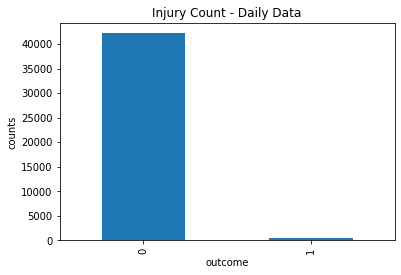

In [ ]:
df_day['injury'].value_counts().plot(kind = 'bar', title = 'Injury Count - Daily Data', xlabel = 'outcome', ylabel = 'counts');
plt.savefig('figures/01_injurycount_dailydata.png')

From the above, we see that our data is heavily imbalanced as the events for no-injury far outweighs the one for injury.

### athletes [injury or no injury]

In [ ]:
df_day.groupby(['athlete_id', 'injury'])['injury'].count() # group to see the injury/no-injury status of each athlete

athlete_id  injury
0           0          303
            1            7
1           0          459
            1            2
2           0         1287
            1            4
3           0          341
            1            3
4           0          674
            1            7
5           0          214
            1            1
6           0          530
            1            4
7           0          299
            1            5
8           0          261
            1            7
9           0         1210
            1           23
10          0          377
            1           10
11          0          154
12          0          169
13          0          317
            1            1
14          0          269
            1            3
15          0          126
16          0          362
            1            3
17          0          859
            1           14
18          0          536
            1            6
19          0          581
         

Surprisingly from the above, there exists some athletes e.g 62, 72, 73 who did not suffer any injury.

### box plot

In [ ]:
cols = list(df_day.columns[:72])
cols.remove('athlete_id') # remove the 'athlete_id' from the columns of the dataframe since it will not be useful in our study

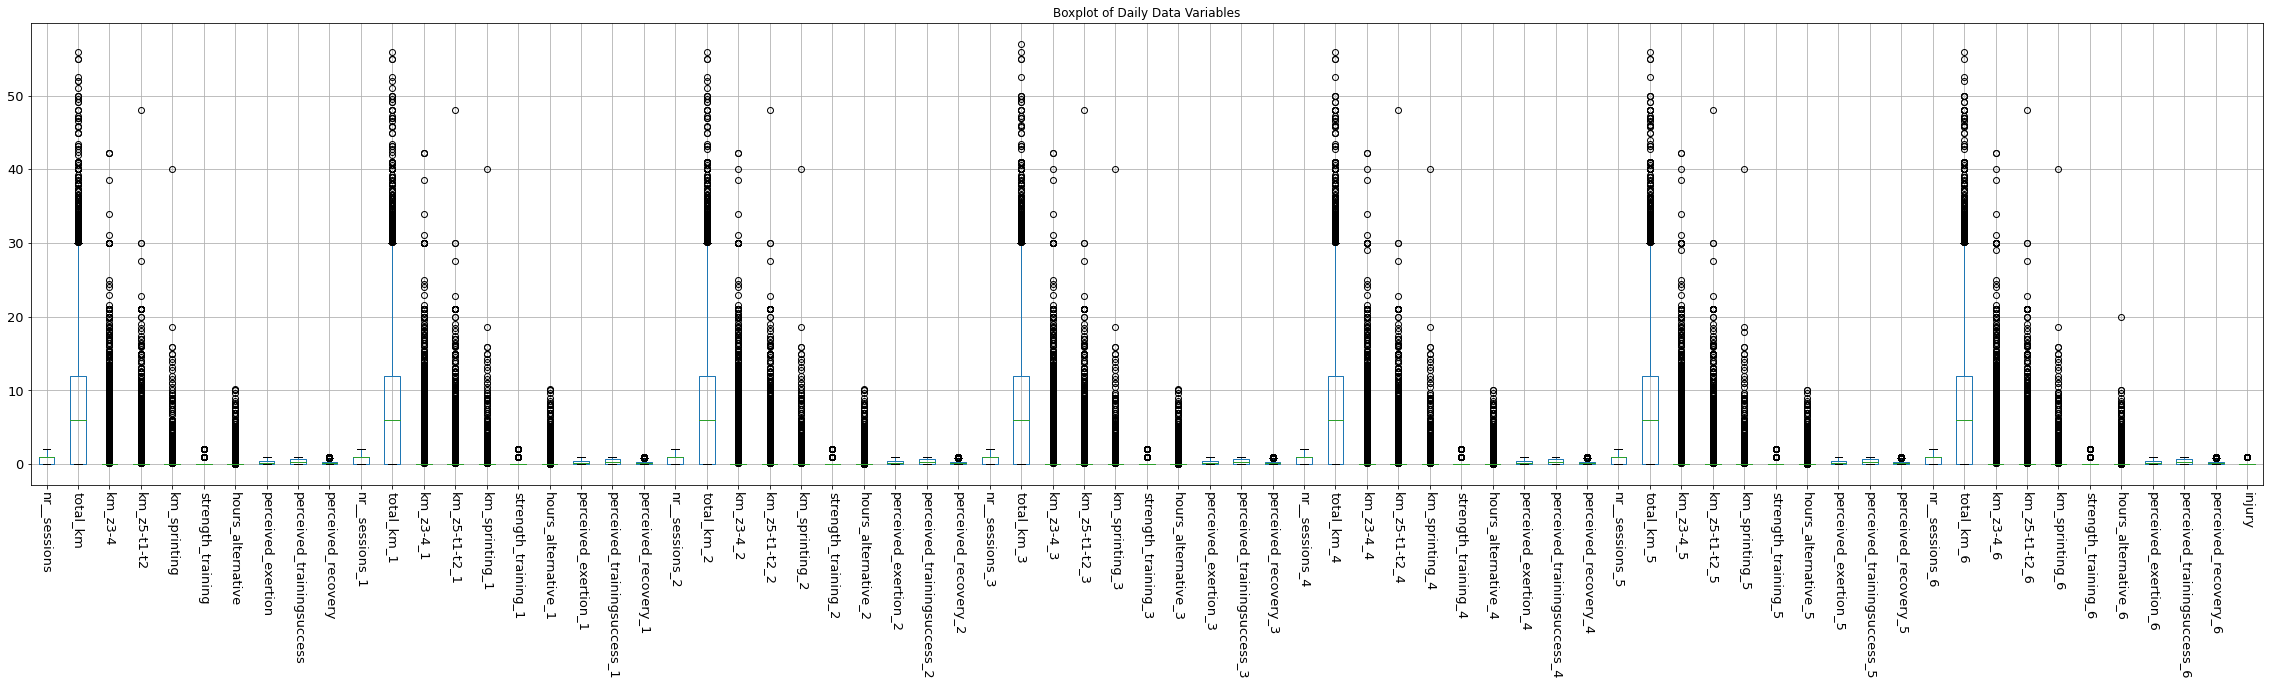

In [ ]:
# plot a box plot to better visualize the above dataframe better

df_day.boxplot(cols,
               figsize = (40,8.5),
               rot=-90,
               fontsize=13);
plt.title('Boxplot of Daily Data Variables')
plt.savefig('figures/02_injurycount_boxplot.png')

In [ ]:
#  df_day.columns[-1:]

In [ ]:
# df_day.boxplot( list( df_day.columns[-1:] ) );

From the above boxplots, we see that a chunk of our data has outliers.

### correlation table

In [ ]:
corr  =  df_day.corr()
corr

,nr__sessions,total_km,km_z3-4,km_z5-t1-t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,nr__sessions_1,total_km_1,km_z3-4_1,km_z5-t1-t2_1,km_sprinting_1,strength_training_1,hours_alternative_1,perceived_exertion_1,perceived_trainingsuccess_1,perceived_recovery_1,nr__sessions_2,total_km_2,km_z3-4_2,km_z5-t1-t2_2,km_sprinting_2,strength_training_2,hours_alternative_2,perceived_exertion_2,perceived_trainingsuccess_2,perceived_recovery_2,nr__sessions_3,total_km_3,km_z3-4_3,km_z5-t1-t2_3,km_sprinting_3,strength_training_3,hours_alternative_3,perceived_exertion_3,perceived_trainingsuccess_3,perceived_recovery_3,nr__sessions_4,total_km_4,km_z3-4_4,km_z5-t1-t2_4,km_sprinting_4,strength_training_4,hours_alternative_4,perceived_exertion_4,perceived_trainingsuccess_4,perceived_recovery_4,nr__sessions_5,total_km_5,km_z3-4_5,km_z5-t1-t2_5,km_sprinting_5,strength_training_5,hours_alternative_5,perceived_exertion_5,perceived_trainingsuccess_5,perceived_recovery_5,nr__sessions_6,total_km_6,km_z3-4_6,km_z5-t1-t2_6,km_sprinting_6,strength_training_6,hours_alternative_6,perceived_exertion_6,perceived_trainingsuccess_6,perceived_recovery_6,athlete_id,injury
nr__sessions,1.000000,0.596912,0.168277,0.176642,0.081524,0.312780,0.236287,0.542963,0.510929,0.555306,0.262761,0.213076,0.080043,0.082879,0.001795,0.123283,0.075338,0.156258,0.158623,0.157880,0.302577,0.247896,0.089096,0.093744,0.018531,0.092850,0.064254,0.176075,0.182005,0.179803,0.263281,0.243082,0.092399,0.096494,0.015654,0.055245,0.054197,0.164395,0.160982,0.161836,0.254929,0.229159,0.076056,0.065886,0.010679,0.063325,0.056985,0.145212,0.150314,0.150918,0.257635,0.241995,0.069082,0.095351,0.034253,0.032969,0.056444,0.148792,0.155320,0.152800,0.233104,0.198261,0.045521,0.071415,0.017262,0.070207,0.044208,0.129306,0.139419,0.135630,-0.016132,0.024088
total_km,0.596912,1.000000,0.391130,0.328533,0.068880,-0.113621,-0.173292,0.339113,0.302535,0.349504,0.202723,0.332265,0.067742,0.028657,-0.001704,0.108358,-0.061207,0.028452,0.071233,0.085201,0.262139,0.475614,0.184952,0.193314,0.034812,-0.033939,-0.103103,0.126367,0.119304,0.140179,0.223199,0.400285,0.114835,0.136082,-0.008274,0.033984,-0.087432,0.075774,0.087243,0.104498,0.228581,0.396150,0.152029,0.105977,0.017864,0.028251,-0.097006,0.079477,0.089402,0.107303,0.206764,0.436127,0.149160,0.175339,-0.005813,-0.068095,-0.085848,0.082312,0.085821,0.104418,0.186704,0.324134,0.087291,0.046730,0.015791,0.046795,-0.075958,0.026235,0.062501,0.069915,-0.053750,0.015945
km_z3-4,0.168277,0.391130,1.000000,-0.086790,-0.025474,-0.064500,-0.058348,0.183381,0.104700,0.109171,0.039958,0.084049,-0.048386,-0.074259,-0.027507,0.045574,0.004551,-0.030680,0.031588,0.012095,0.071272,0.152300,0.092685,0.040411,0.025913,-0.050714,-0.036719,0.038368,0.053652,0.038901,0.073292,0.151999,0.079150,0.054688,-0.020662,-0.001296,-0.025827,0.032761,0.045207,0.030561,0.086943,0.116116,0.089342,-0.026613,-0.006914,0.071109,-0.027108,0.026985,0.047378,0.035691,0.071017,0.168533,0.106267,0.071115,-0.015929,-0.049309,-0.020003,0.043295,0.048243,0.036860,0.049913,0.065963,-0.003161,-0.051439,0.004103,0.044122,-0.021680,-0.021365,0.022653,0.004662,0.002224,0.000663
km_z5-t1-t2,0.176642,0.328533,-0.086790,1.000000,0.003298,-0.082506,-0.061606,0.255398,0.098254,0.138645,0.080186,0.034156,-0.073659,-0.078071,-0.035485,0.175869,-0.016082,-0.014146,0.020787,0.037807,0.098012,0.191144,0.101389,0.177193,0.029903,-0.055686,-0.039667,0.091954,0.052324,0.085026,0.060725,0.109970,-0.024865,0.059585,-0.018055,0.027166,-0.025762,0.026566,0.022893,0.042453,0.083072,0.120087,0.036610,0.069351,0.024596,0.011674,-0.038691,0.051245,0.036274,0.051755,0.081260,0.180234,0.022211,0.194275,-0.003277,-0.056469,-0.022558,0.067904,0.038536,0.069361,0.061082,0.048311,-0.024922,-0.037275,0.015416,0.093961,-0.035926,-0.001769,0.013813,0.027813,-0.027580,0.019899
km_sprinting,0.081524,0.068880,-0.025474,0.003298,1.000000,-0.025971,-0.033757,0.0

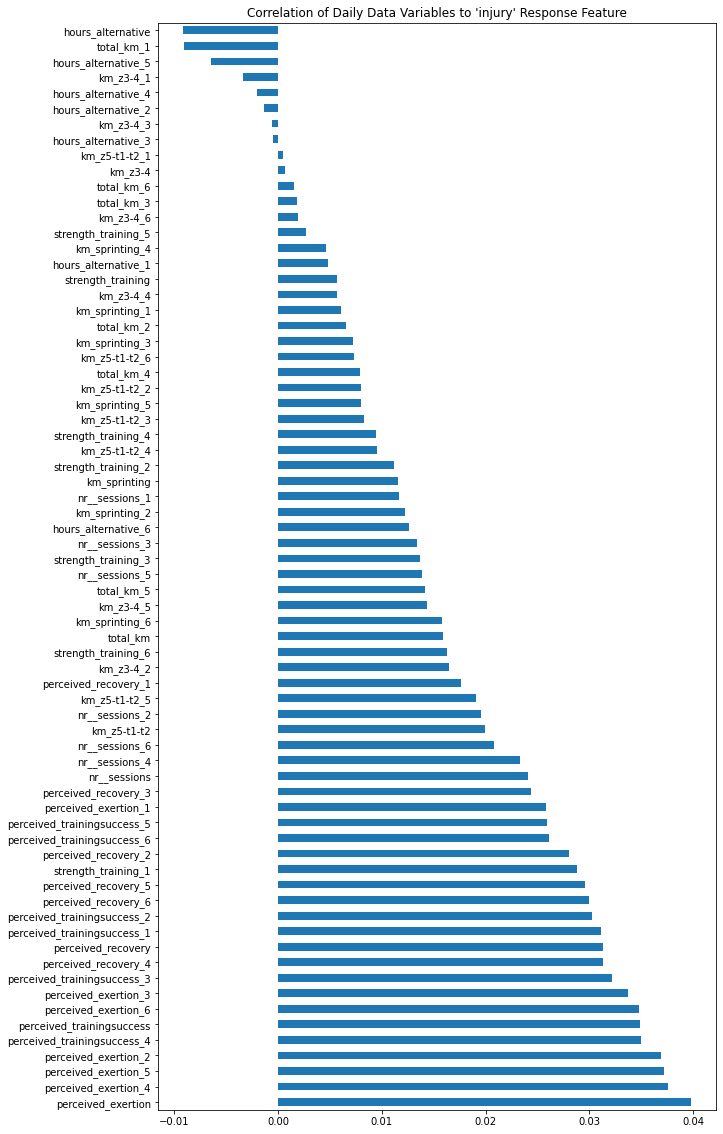

In [ ]:
corr_day = df_day.corr().loc['injury'].sort_values(ascending = False)
plt.figure(figsize = (10,20))
corr_day.drop(['injury', 'athlete_id']).plot(kind = 'barh')
plt.title("Correlation of Daily Data Variables to 'injury' Response Feature")
plt.savefig('figures/03_injurycount_correlation.png')

The above shows that all variables are weakly correlated with our `injury` variable.

### Correlation heatmap

In [ ]:
plt.figure(figsize = (60,40))

sns.heatmap(corr, cmap="YlGnBu", annot=True);

Output hidden; open in https://colab.research.google.com to view.

### scatter plot relationships & histogram

In [ ]:
# pick the first ten columns and then the 'injury' column
df_day.iloc[ :,np.r_[:10, -2]]

,nr__sessions,total_km,km_z3-4,km_z5-t1-t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,injury
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,0
...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,1
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,1
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,1


The scatter plot helps to understand the relationship between variables. In this regard, we can plot the entire relationship amongst the variables. An example is below: 

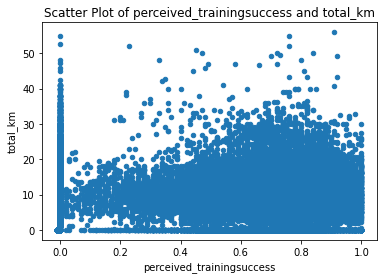

In [ ]:
df_day.plot(kind = 'scatter', x ='perceived_trainingsuccess', y='total_km')
plt.title('Scatter Plot of perceived_trainingsuccess and total_km');

Furthermore, we can make a scatter plot of the entire dataframe. Mind you, this will take some time to run depending on the size of the dataframe.We plot a few subset below.

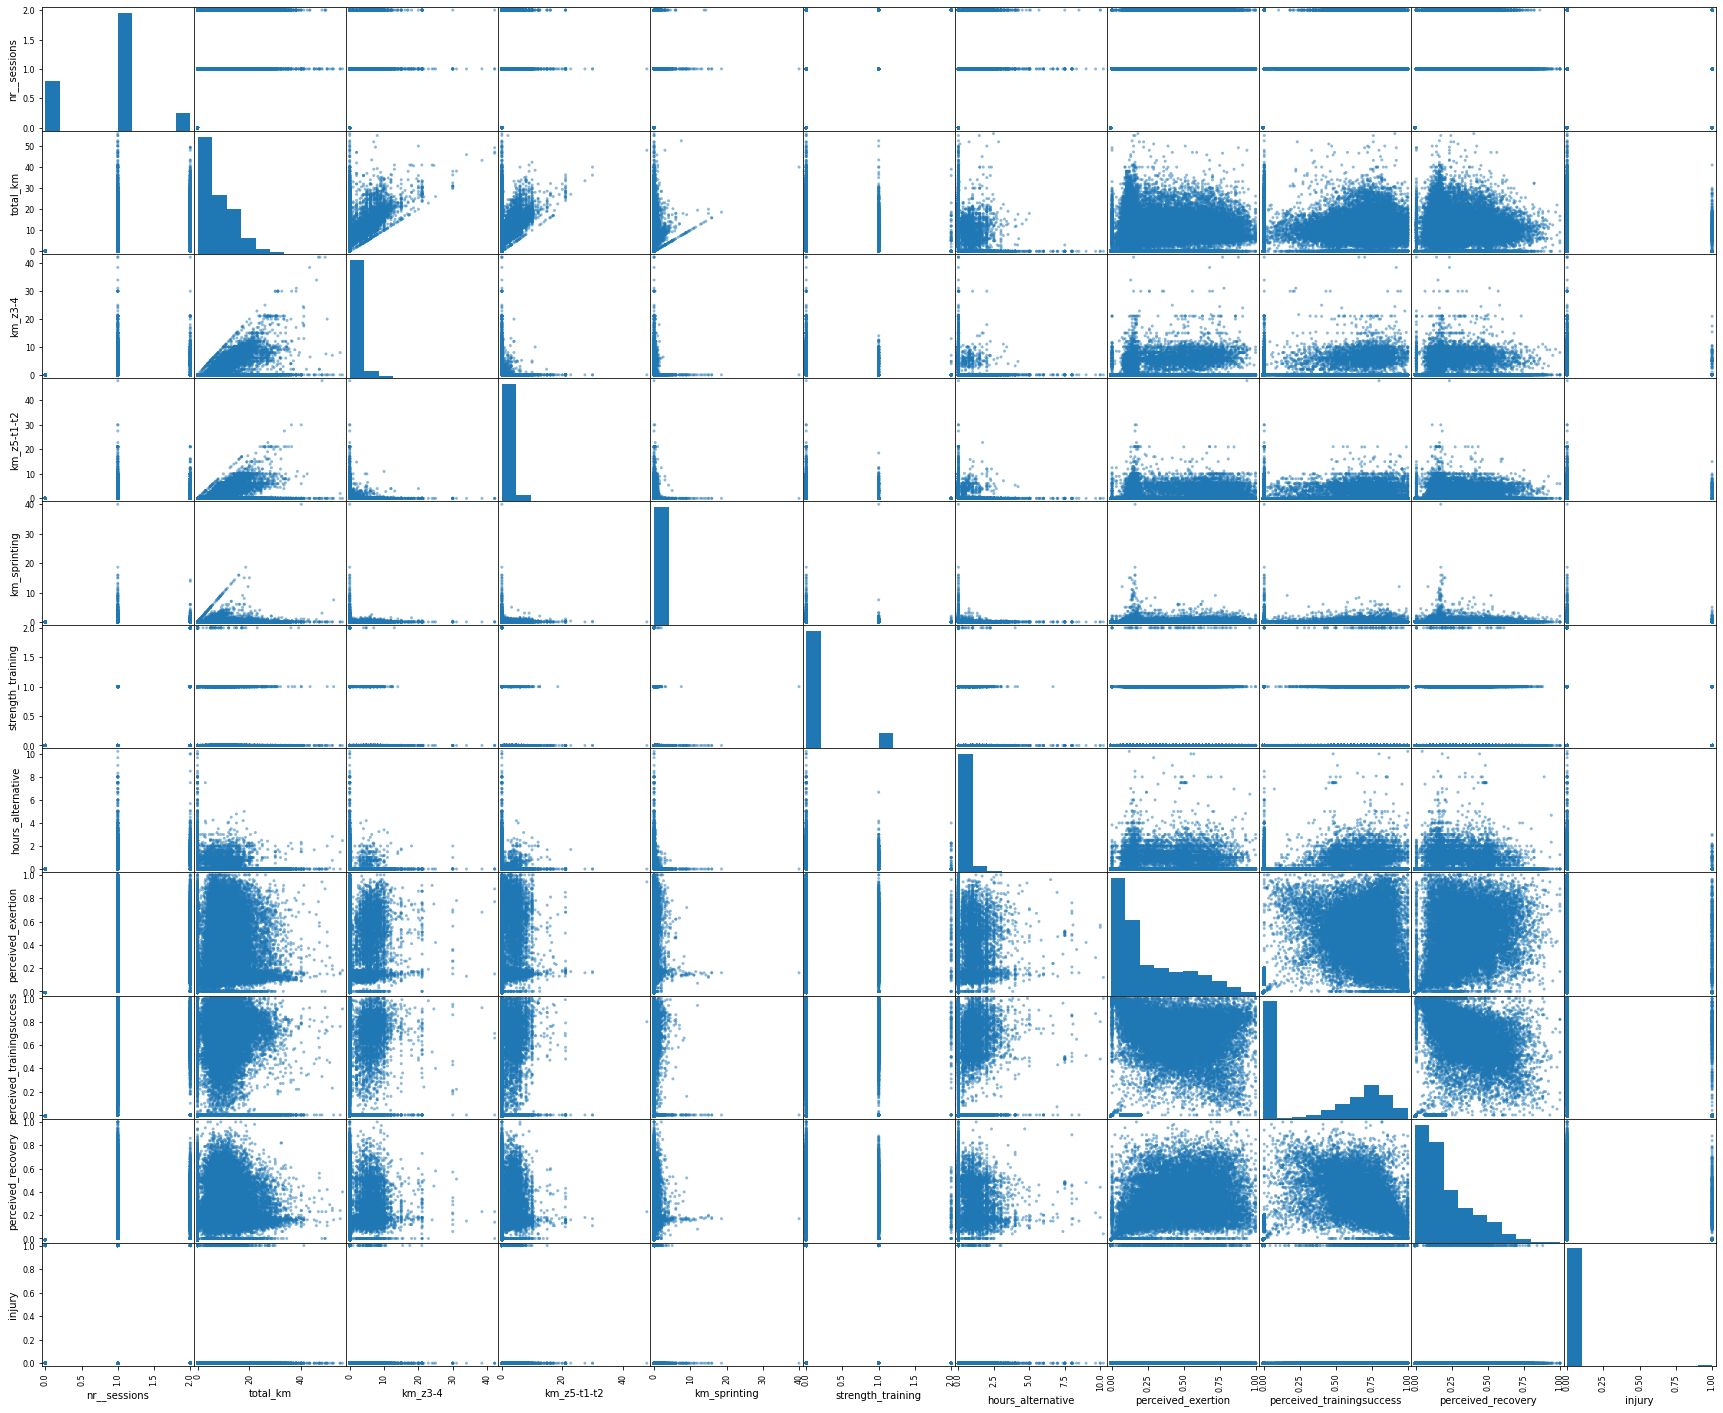

In [ ]:
pd.plotting.scatter_matrix( df_day.iloc[ :,np.r_[:10, -2]], figsize = (30,25) );

From the above, we can see variables being plotted against each other. It is important to know that the scatter plot only helps us to visualize what was seen in the correlation heatmap.

Furthermore, in the plot above, when a variable is being plotted against itself, a histogram is the result. This histogram shows the distribution of that particular variable/features.

## Weekly Data

As done earlier, we repeat the same procedure for the weekly data.

### data description

In [29]:
df_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   nr_sessions                                   42798 non-null  category
 1   nr_rest_days                                  42798 non-null  category
 2   total_kms                                     42798 non-null  float64 
 3   max_km_one_day                                42798 non-null  float64 
 4   total_km_z3-z4-z5-t1-t2                       42798 non-null  float64 
 5   nr_tough_sessions_(effort_in_z5,_t1_or_t2)    42798 non-null  category
 6   nr_days_with_interval_session                 42798 non-null  category
 7   total_km_z3-4                                 42798 non-null  float64 
 8   max_km_z3-4_one_day                           42798 non-null  float64 
 9   total_km_z5-t1-t2                             4279

In [ ]:
df_wk.describe()

,nr__sessions,nr__rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)",nr__days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,max_km_z5-t1-t2_one_day,total_hours_alternative_training,nr__strength_trainings,avg_exertion,min_exertion,max_exertion,avg_training_success,min_training_success,max_training_success,avg_recovery,min_recovery,max_recovery,nr__sessions_1,nr__rest_days_1,total_kms_1,max_km_one_day_1,total_km_z3-z4-z5-t1-t2_1,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)_1",nr__days_with_interval_session_1,total_km_z3-4_1,max_km_z3-4_one_day_1,total_km_z5-t1-t2_1,max_km_z5-t1-t2_one_day_1,total_hours_alternative_training_1,nr__strength_trainings_1,avg_exertion_1,min_exertion_1,max_exertion_1,avg_training_success_1,min_training_success_1,max_training_success_1,avg_recovery_1,min_recovery_1,max_recovery_1,nr__sessions_2,nr__rest_days_2,total_kms_2,max_km_one_day_2,total_km_z3-z4-z5-t1-t2_2,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)_2",nr__days_with_interval_session_2,total_km_z3-4_2,max_km_z3-4_one_day_2,total_km_z5-t1-t2_2,max_km_z5-t1-t2_one_day_2,total_hours_alternative_training_2,nr__strength_trainings_2,avg_exertion_2,min_exertion_2,max_exertion_2,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,athlete_id,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,2.725291,1.148982,0.815599,0.319933,0.188664,0.470580,0.447541,0.338363,0.525050,0.255519,0.185625,0.344188,5.808215,1.878639,49.255052,13.917786,9.383976,0.924693,1.664213,4.841444,3.438126,4.021716,2.692813,1.171797,0.818239,0.319633,0.188058,0.470072,0.448127,0.339773,0.525382,0.255125,0.185118,0.343640,5.810786,1.884130,48.807134,13.816185,9.297430,0.915300,1.652671,4.793161,3.399014,3.977450,2.665361,1.204381,0.824384,0.319983,0.187780,0.470030,0.448141,0.339618,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,3.547674,2.361413,0.996134,0.201818,0.151457,0.299429,0.340161,0.297717,0.390642,0.153278,0.127988,0.219596,2.485295,1.850877,36.829427,9.036953,8.921317,1.040641,1.269725,7.007572,4.596950,5.569741,3.429545,2.373672,0.991930,0.201663,0.151406,0.299245,0.340522,0.298297,0.390755,0.153163,0.127769,0.219385,2.495606,1.853418,36.962138,9.106966,8.890523,1.037016,1.272267,6.930768,4.502906,5.518435,3.371852,2.443005,0.997673,0.201807,0.151832,0.298909,0.340310,0.298253,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### response variable `injury`

In [ ]:
df_wk['injury'].value_counts()

0    42223
1      575
Name: injury, dtype: int64

In [ ]:
df_wk['injury'].value_counts()[1]/df_wk['injury'].value_counts().sum() * 100

1.3435207252675359

The injury category in our data consists of only 1.34% of the entire data.

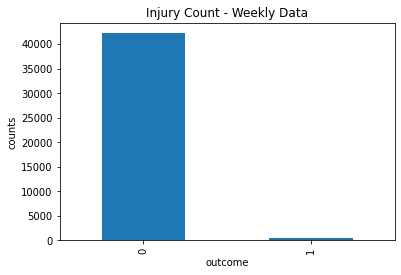

In [ ]:
df_wk['injury'].value_counts().plot(kind = 'bar', title = 'Injury Count - Weekly Data', xlabel = 'outcome', ylabel = 'counts');
plt.savefig('figures/01_injurycount_weekdata.png')

From the above, we see that our data is heavily imbalanced as the events for no-injury far outweighs the one for injury.

### athletes [injury or no injury]

In [ ]:
df_wk.groupby(['athlete_id', 'injury'])['injury'].count() # group to see the injury/no-injury status of each athlete

athlete_id  injury
0           0          303
            1            7
1           0          459
            1            2
2           0         1287
            1            4
3           0          341
            1            3
4           0          674
            1            7
5           0          201
            1            1
6           0          530
            1            4
7           0          299
            1            5
8           0          261
            1            7
9           0         1210
            1           22
10          0          377
            1           10
11          0          154
12          0          169
13          0          317
            1            1
14          0          269
            1            3
15          0          126
16          0          362
            1            3
17          0          859
            1           14
18          0          536
            1            6
19          0          588
         

Again, just as reflected in the daily data, the weekly data also shows us that there exists some athletes e.g 62, 72, 73 who did not suffer any injury.

### box plot

In [ ]:
df_wk.shape

(42798, 72)

In [ ]:
df_wk.columns

Index(['nr__sessions', 'nr__rest_days', 'total_kms', 'max_km_one_day',
       'total_km_z3-z4-z5-t1-t2',
       'nr__tough_sessions_(effort_in_z5,_t1_or_t2)',
       'nr__days_with_interval_session', 'total_km_z3-4',
       'max_km_z3-4_one_day', 'total_km_z5-t1-t2', 'max_km_z5-t1-t2_one_day',
       'total_hours_alternative_training', 'nr__strength_trainings',
       'avg_exertion', 'min_exertion', 'max_exertion', 'avg_training_success',
       'min_training_success', 'max_training_success', 'avg_recovery',
       'min_recovery', 'max_recovery', 'nr__sessions_1', 'nr__rest_days_1',
       'total_kms_1', 'max_km_one_day_1', 'total_km_z3-z4-z5-t1-t2_1',
       'nr__tough_sessions_(effort_in_z5,_t1_or_t2)_1',
       'nr__days_with_interval_session_1', 'total_km_z3-4_1',
       'max_km_z3-4_one_day_1', 'total_km_z5-t1-t2_1',
       'max_km_z5-t1-t2_one_day_1', 'total_hours_alternative_training_1',
       'nr__strength_trainings_1', 'avg_exertion_1', 'min_exertion_1',
       'max_exertion_

In [ ]:
cols = list(df_wk.columns[:-4])
cols.remove('athlete_id') # remove the 'athlete_id' from the columns of the dataframe since it will not be useful in our study

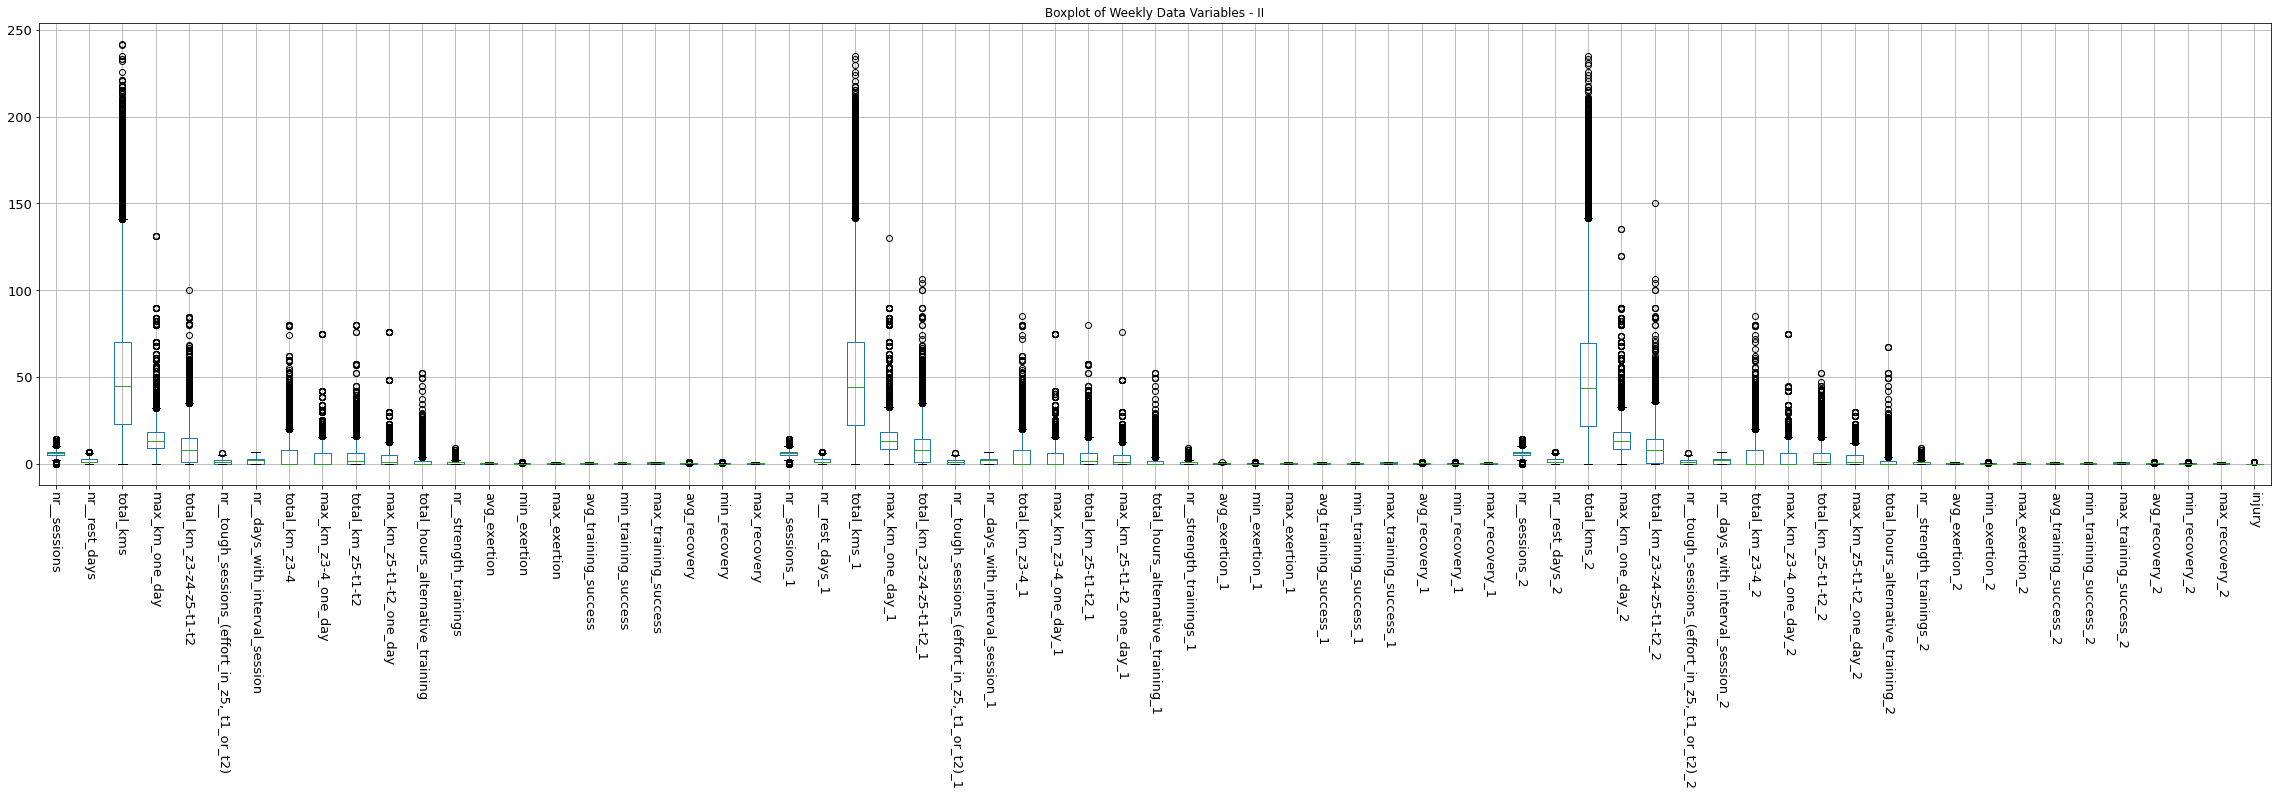

In [ ]:
# plot a box plot to better visualize the above dataframe better

df_wk.boxplot(cols,
               figsize = (40,8.5),
               rot=-90,
               fontsize=13);
plt.title('Boxplot of Weekly Data Variables - II')
plt.savefig('figures/02_injurycount_week_boxplot.png')

From the above boxplots, we see that a chunk of our data has outliers.

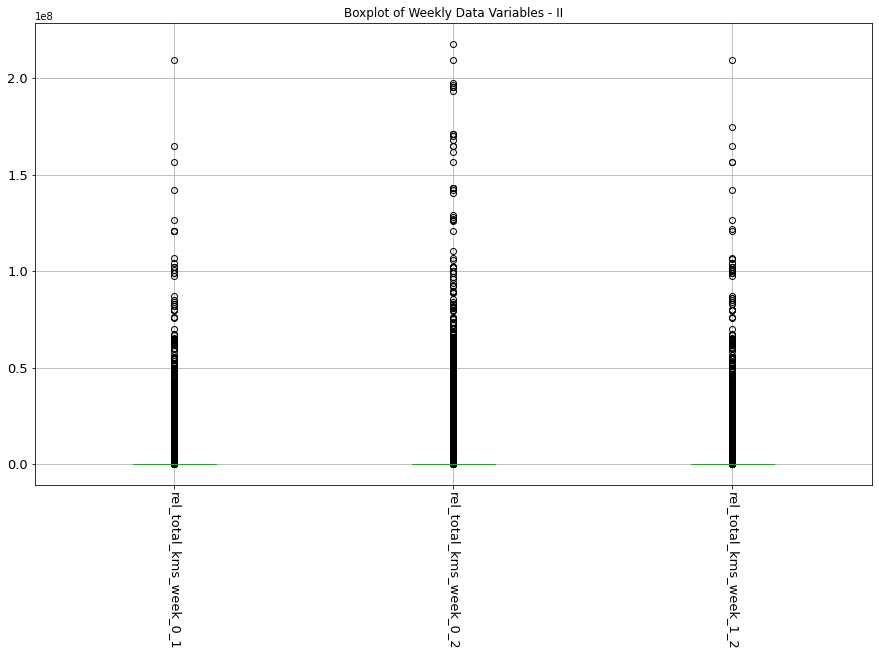

In [ ]:
df_wk.boxplot(list(df_wk.columns[-4:-1]),
               figsize = (15,8.5),
               rot=-90,
               fontsize=13);
               
plt.title('Boxplot of Weekly Data Variables - II')
plt.savefig('figures/02_injurycount_week_boxplot_02.png')

After plotting the last three columns we left out, we discover that this three (3) variables are totally filled with outliers.

### correlation table

In [ ]:
corr_wk  =  df_wk.corr()
corr_wk

,nr__sessions,nr__rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)",nr__days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,max_km_z5-t1-t2_one_day,total_hours_alternative_training,nr__strength_trainings,avg_exertion,min_exertion,max_exertion,avg_training_success,min_training_success,max_training_success,avg_recovery,min_recovery,max_recovery,nr__sessions_1,nr__rest_days_1,total_kms_1,max_km_one_day_1,total_km_z3-z4-z5-t1-t2_1,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)_1",nr__days_with_interval_session_1,total_km_z3-4_1,max_km_z3-4_one_day_1,total_km_z5-t1-t2_1,max_km_z5-t1-t2_one_day_1,total_hours_alternative_training_1,nr__strength_trainings_1,avg_exertion_1,min_exertion_1,max_exertion_1,avg_training_success_1,min_training_success_1,max_training_success_1,avg_recovery_1,min_recovery_1,max_recovery_1,nr__sessions_2,nr__rest_days_2,total_kms_2,max_km_one_day_2,total_km_z3-z4-z5-t1-t2_2,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)_2",nr__days_with_interval_session_2,total_km_z3-4_2,max_km_z3-4_one_day_2,total_km_z5-t1-t2_2,max_km_z5-t1-t2_one_day_2,total_hours_alternative_training_2,nr__strength_trainings_2,avg_exertion_2,min_exertion_2,max_exertion_2,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,athlete_id,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2
nr__sessions,1.000000,-0.906786,0.656522,0.530903,0.500779,0.344334,0.509276,0.331321,0.327096,0.355501,0.351832,0.237880,0.413895,0.255812,0.115104,0.309454,0.235003,0.173206,0.247594,0.230501,0.144654,0.268542,0.676393,-0.627984,0.487957,0.426449,0.366731,0.242650,0.359370,0.243183,0.252995,0.270768,0.285746,0.142898,0.285301,0.207768,0.114292,0.241472,0.204621,0.168530,0.207749,0.199282,0.146503,0.212726,0.565528,-0.530332,0.424838,0.368719,0.325357,0.198487,0.306176,0.224714,0.234017,0.239156,0.254343,0.122779,0.242537,0.172734,0.104311,0.199016,0.176740,0.142797,0.178580,0.173642,0.132218,0.181226,-0.020747,0.029381,-0.030347,0.012502,-0.006581
nr__rest_days,-0.906786,1.000000,-0.605771,-0.495342,-0.488743,-0.377336,-0.541661,-0.314745,-0.318835,-0.353146,-0.353267,-0.172066,-0.360748,-0.302520,-0.137443,-0.369269,-0.279783,-0.197586,-0.299475,-0.293277,-0.188792,-0.338908,-0.625004,0.665847,-0.450090,-0.406406,-0.356743,-0.273302,-0.386921,-0.227017,-0.242110,-0.269765,-0.283535,-0.086288,-0.252786,-0.260658,-0.156277,-0.293174,-0.242674,-0.196513,-0.248830,-0.255234,-0.193722,-0.268483,-0.531466,0.558301,-0.396841,-0.355651,-0.314100,-0.228244,-0.330087,-0.205658,-0.219628,-0.240110,-0.252911,-0.064584,-0.217388,-0.223189,-0.144323,-0.246197,-0.210237,-0.167636,-0.214634,-0.224402,-0.174835,-0.232081,-0.006945,-0.032846,0.031959,-0.004970,0.011207
total_kms,0.656522,-0.605771,1.000000,0.868449,0.730747,0.348023,0.606813,0.543994,0.536211,0.463877,0.484539,-0.209115,0.023178,0.056799,-0.001112,0.113100,0.082544,0.039099,0.090974,0.092978,0.042173,0.127541,0.513487,-0.474879,0.811890,0.722525,0.580303,0.277920,0.479116,0.430586,0.435663,0.384876,0.419672,-0.185026,-0.005488,0.026760,-0.015245,0.080506,0.067997,0.034872,0.072741,0.080837,0.042433,0.103462,0.452302,-0.421094,0.746300,0.666430,0.529737,0.242068,0.429986,0.402202,0.412157,0.349296,0.385740,-0.164432,-0.024127,0.012580,-0.016239,0.061309,0.059313,0.030418,0.061654,0.068156,0.037955,0.084993,-0.071692,0.007350,-0.018341,0.017213,0.007794
max_km_one_day,0.530903,-0.495342,0.868449,1.000000,0.646318,0.271812,0.498367,0.485988,0.510458,0.393555,0.432522,-0.168996,0.013966,0.092639,0.033199,0.140155,0.122074,0.074519,0.133537,0.127575,0.066736,0.159821,0.460921,-0.439083,0.739196,0.740157,0.526075,0.242934,0.432206,0.392731,0.402534,0.333258,0.363068,-0.150286,0.004274,0.057695,0.007370,0.108668,0.103195,0.060006,0.112874,0.109165,0.056615,0.136951,0.406382,-0.387005,0.686732,0.692881,0.494468,0.213157,0.392627,0.370704,0.381708,0.314403,0

In [ ]:
df_wk.corr().loc['injury'].sort_values(ascending = False)

injury                                           1.000000
max_exertion                                     0.051565
avg_exertion                                     0.048771
max_exertion_1                                   0.045636
avg_exertion_1                                   0.043397
max_recovery                                     0.043163
max_exertion_2                                   0.040890
avg_exertion_2                                   0.038910
max_training_success                             0.038485
max_recovery_1                                   0.036539
max_training_success_1                           0.035923
avg_training_success                             0.035395
max_training_success_2                           0.034510
max_recovery_2                                   0.034062
avg_recovery                                     0.033640
avg_training_success_1                           0.033339
avg_training_success_2                           0.031828
avg_recovery_1

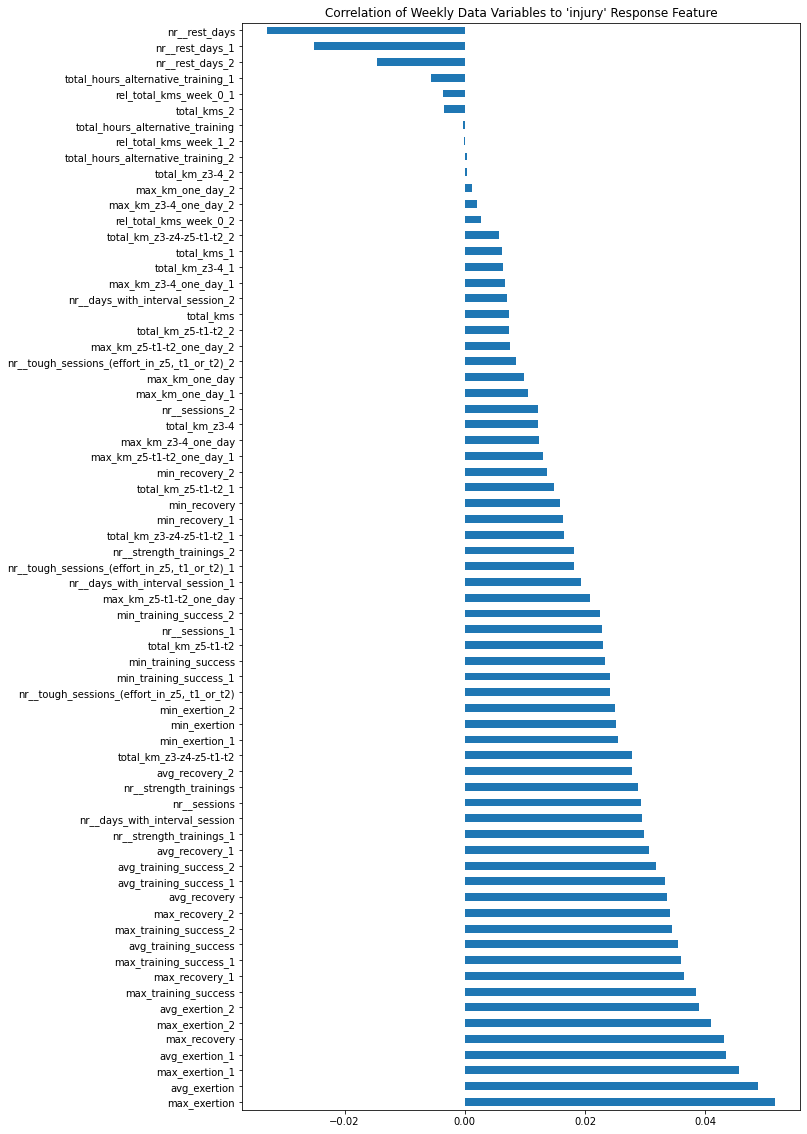

In [ ]:
corr_wk = df_wk.corr().loc['injury'].sort_values(ascending = False)
plt.figure(figsize = (10,20))
corr_wk.drop(['injury', 'athlete_id']).plot(kind = 'barh')
plt.title("Correlation of Weekly Data Variables to 'injury' Response Feature")
plt.savefig('figures/03_injurycount_week_correlation.png')

The above shows that all variables are weakly correlated with our `injury` variable.

### Correlation heatmap

In [ ]:
plt.figure(figsize = (60,40))

sns.heatmap(df_wk.corr(), cmap="YlGnBu", annot=True);

Output hidden; open in https://colab.research.google.com to view.

Unlike the previous correlation heatmap for the daily data, the weekly data provides us many variables that are colinear (i.e strongly correlated).

### scatter plot relationships & histogram

In [ ]:
# pick the first ten columns and then the 'injury' column
df_wk.iloc[ :, np.r_[:10, -5:-4] ]

# the reason why we select the injury column is to witness some association when we make the plot below.

,nr__sessions,nr__rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr__tough_sessions_(effort_in_z5,_t1_or_t2)",nr__days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,injury
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,0
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,1
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,1


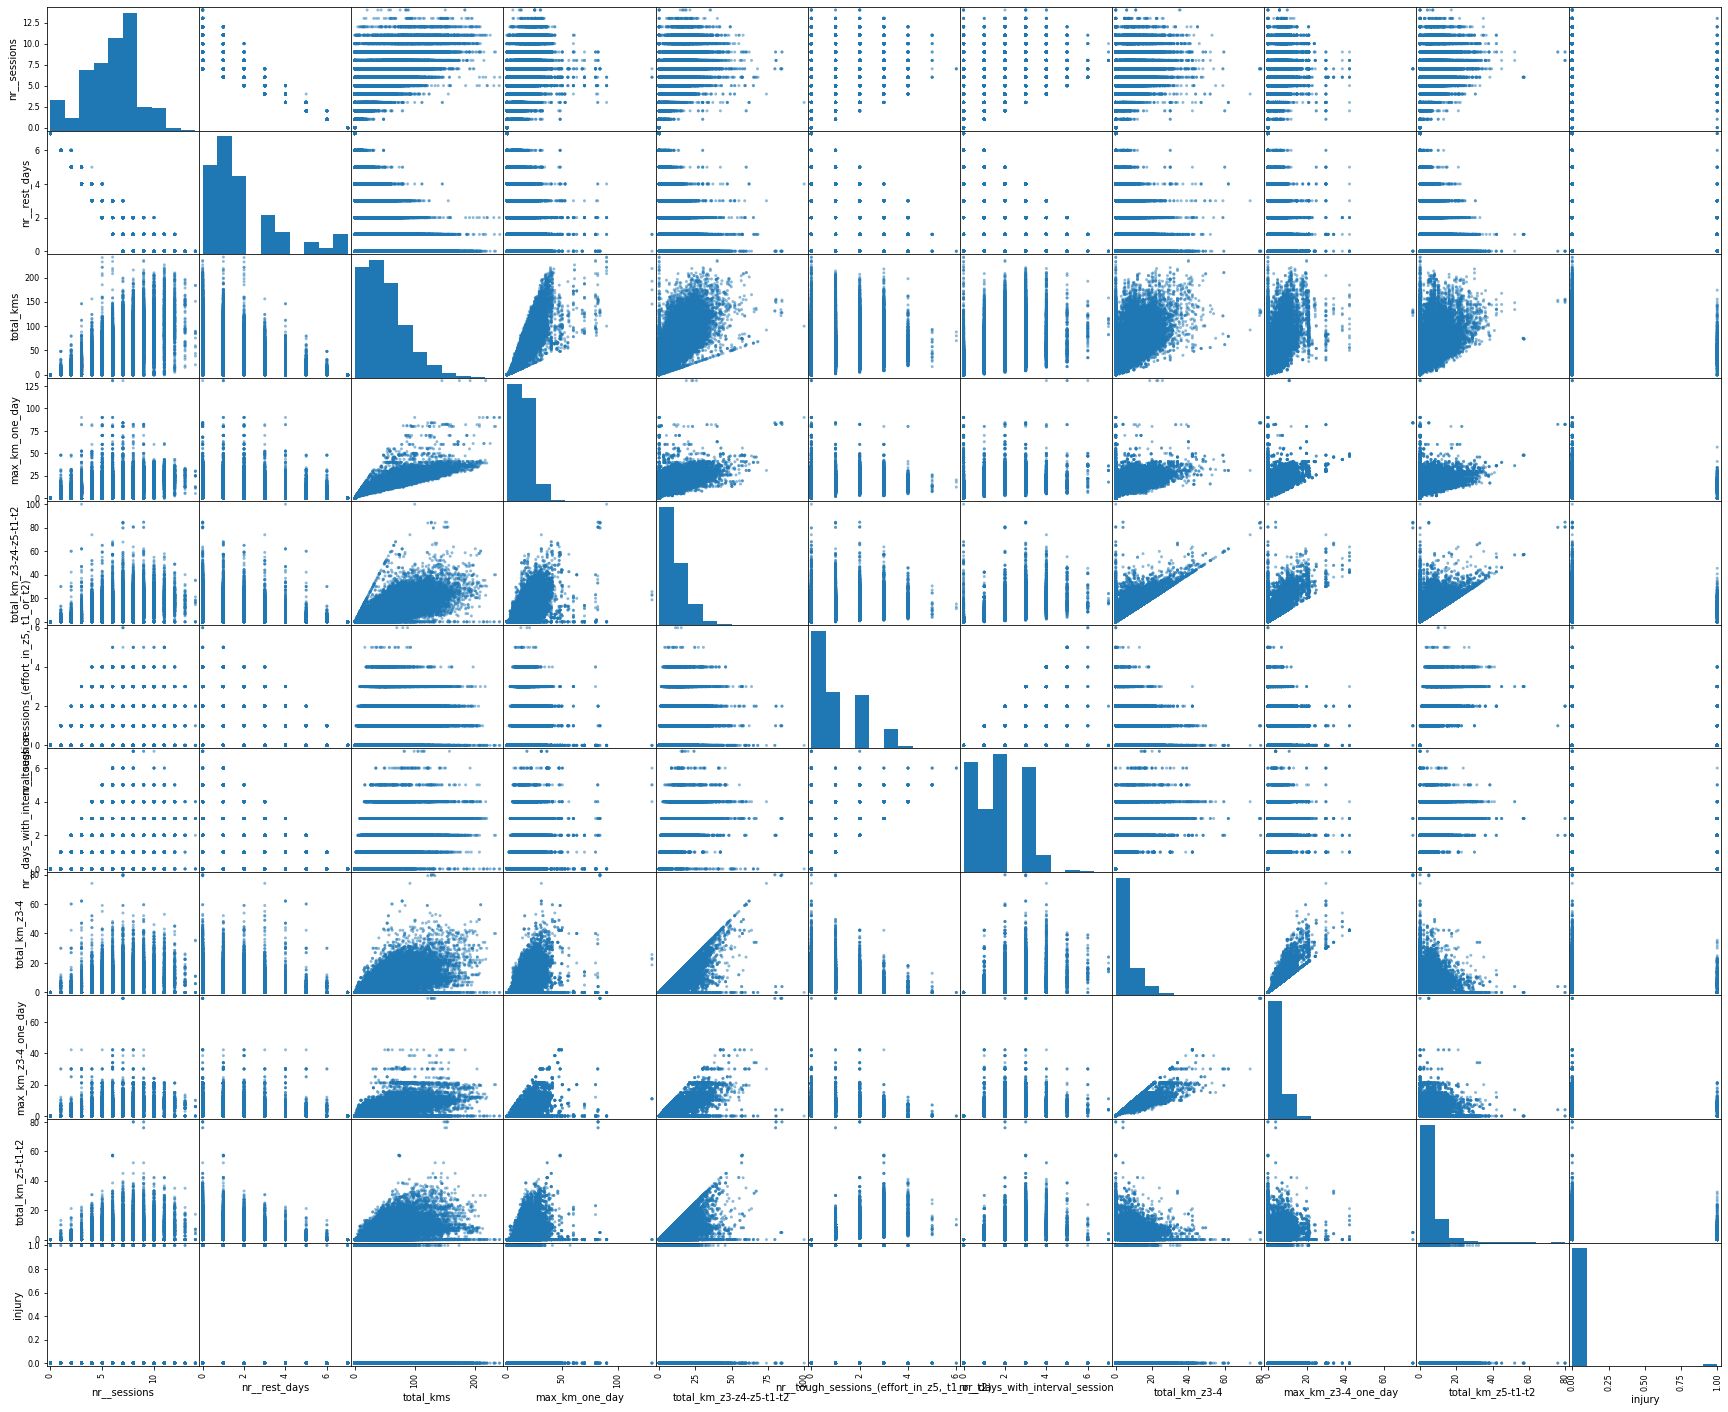

In [ ]:
pd.plotting.scatter_matrix( df_wk.iloc[ :,np.r_[:10,  -5:-4]], figsize = (30,25) );

# Conclusion

From our preliminary analysis, we conclude the following:



1.   The data consists of no missing values.
2.   The datasets are heavily imbalanced (i.e more no-injury than injury) .
1. The response variable `injury` is weakly correlated with all the explanatory variables in both datasets.
1. The datasets consist entirely of numerical values (no text/objects/strings).


# Next Step

**Implement ML Models**